# Downloading VIX data

In [13]:
import pandas as pd
import yfinance as yf
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
import matplotlib.pyplot as plt
import seaborn as sns


def download_data(tickers, start, end):
    historical_data = pd.DataFrame()

    for ticker in tickers:
        try:
            # Download historical data from Yahoo Finance
            data = yf.download(ticker, start=start, end=end)
            
            # Add a column with the ticker symbol
            data['Ticker'] = ticker
            
            # Reset index and add date column
            data = data.reset_index()
            
            # Give correct format to Date column
            data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
            
            # Concatenate data to the main DataFrame
            historical_data = pd.concat([historical_data, data])
            
        except Exception as Error:
            print(f'Error downloading data for {ticker}: {str(e)}')

    return historical_data

# Define tickers and date range
tickers = ["^VIX"]
start_date = '1998-01-01'
end_date = '2024-01-01'

# Download historical data
price_history = download_data(tickers, start_date, end_date)

# Choose selected columns
price_history = price_history[['Date', 'Close', 'Ticker']]

# Pivoting DataFrame
price_history = price_history.pivot(index='Date', columns='Ticker', values='Close')

[*********************100%%**********************]  1 of 1 completed


In [14]:
# Renaming index
price_history.index.name = 'DATE'

# Datetime format to index
price_history.index = pd.to_datetime(price_history.index)

# Grouping by month with mean
price_history = price_history.groupby(price_history.index.to_period('M')).agg('mean')

# Print
price_history

Ticker,^VIX
DATE,
1998-01,23.866500
1998-02,19.998947
1998-03,20.158636
1998-04,22.028571
1998-05,20.874000
...,...
2023-08,15.853913
2023-09,15.241000
2023-10,18.887727


# Downloading technical data from S&P500 index

In [15]:
# Defining ticker
ticker = "^GSPC"

# Defining start
start_date = "1998-01-01"

# Defining end
end_date = "2024-01-01"

# Base
sp500 = yf.download(ticker, start=start_date, end=end_date)

# Calculating moving average 50 and 200
sma_50 = SMAIndicator(close=sp500['Close'], window=50)
sp500['SMA_50'] = sma_50.sma_indicator()

sma_200 = SMAIndicator(close=sp500['Close'], window=200)
sp500['SMA_200'] = sma_200.sma_indicator()

# Step 3: Calculate Relative Strength Index (RSI)
rsi_indicator = RSIIndicator(close=sp500['Close'])
sp500['RSI'] = rsi_indicator.rsi()

# Cleaning data
sp500.drop(['Open', 'Close', 'High', 'Low', 'Adj Close'], axis=1, inplace=True)

# Renaming index
sp500.index.name = 'DATE'

# Printing
sp500

[*********************100%%**********************]  1 of 1 completed


,Volume,SMA_50,SMA_200,RSI
DATE,,,,
1998-01-02,366730000,NaN,NaN,NaN
1998-01-05,628070000,NaN,NaN,NaN
1998-01-06,618360000,NaN,NaN,NaN
1998-01-07,667390000,NaN,NaN,NaN
1998-01-08,652140000,NaN,NaN,NaN
...,...,...,...,...
2023-12-22,3046770000,4468.218584,4335.861046,71.069402
2023-12-26,2513910000,4477.157988,4340.426846,72.704374
2023-12-27,2748450000,4485.316992,4345.055946,73.256889


In [16]:
# Grouping by month with mean
sp500 = sp500.groupby(sp500.index.to_period('M')).agg('mean')

# Drop NaNs from dataframe
sp500 = sp500.dropna()

# Printing
sp500

,Volume,SMA_50,SMA_200,RSI
DATE,,,,
1998-10,8.182568e+08,1037.751182,1071.411241,52.240208
1998-11,6.725640e+08,1051.228810,1082.556657,70.783049
1998-12,6.900659e+08,1114.600713,1097.654393,61.586491
1999-01,8.533421e+08,1184.945938,1112.406447,60.814687
1999-02,7.660979e+08,1224.484461,1125.385239,51.777563
...,...,...,...,...
2023-08,3.775688e+09,4439.430929,4123.123807,47.675647
2023-09,3.674149e+09,4475.096174,4181.626158,44.397154
2023-10,3.796339e+09,4399.047676,4223.552843,40.547568


In [17]:
technical_data = pd.merge(price_history, sp500, left_index=True, right_index=True, how='outer')
technical_data = technical_data.dropna()
technical_data.index = technical_data.index.to_timestamp()
technical_data

,^VIX,Volume,SMA_50,SMA_200,RSI
DATE,,,,,
1998-10-01,36.608182,8.182568e+08,1037.751182,1071.411241,52.240208
1998-11-01,26.223000,6.725640e+08,1051.228810,1082.556657,70.783049
1998-12-01,25.479091,6.900659e+08,1114.600713,1097.654393,61.586491
1999-01-01,28.035263,8.533421e+08,1184.945938,1112.406447,60.814687
1999-02-01,28.822632,7.660979e+08,1224.484461,1125.385239,51.777563
...,...,...,...,...,...
2023-08-01,15.853913,3.775688e+09,4439.430929,4123.123807,47.675647
2023-09-01,15.241000,3.674149e+09,4475.096174,4181.626158,44.397154
2023-10-01,18.887727,3.796339e+09,4399.047676,4223.552843,40.547568


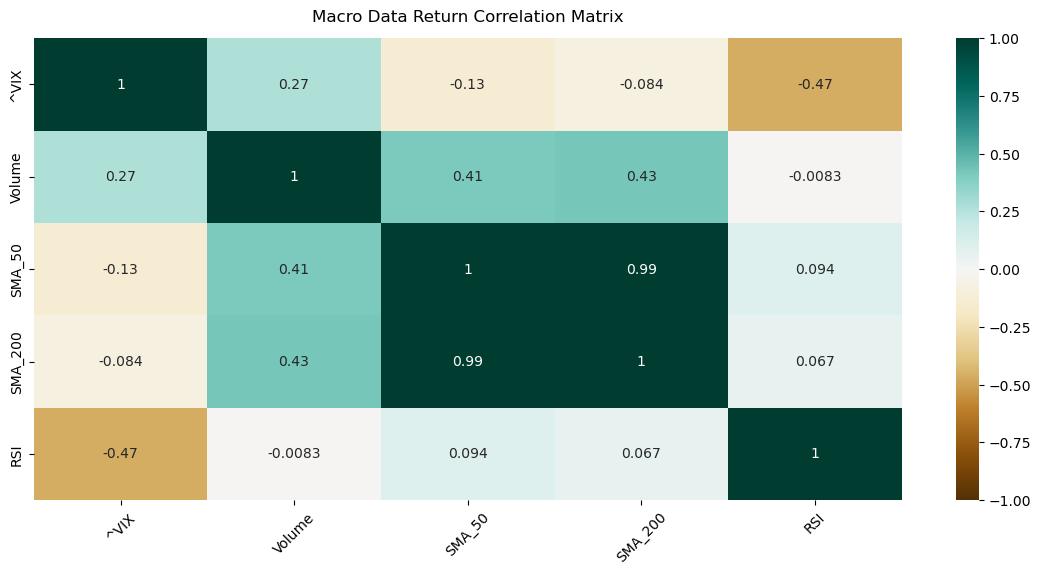

In [18]:
plt.figure(figsize=(14, 6))
corr = technical_data.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True , cmap='BrBG' )
heatmap.set_title('Macro Data Return Correlation Matrix', fontdict={'fontsize':12}, pad=12) ;
plt.xticks(rotation=45)
plt.show()

# Dealing with multicolineality

In [19]:
technical_data = technical_data.drop(['SMA_50'], axis=1)

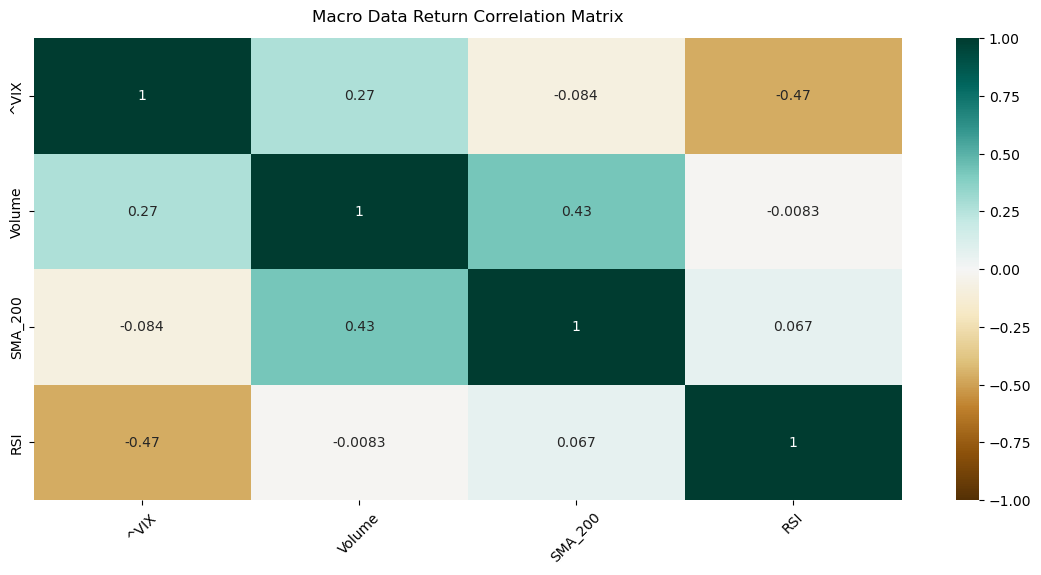

In [20]:
plt.figure(figsize=(14, 6))
corr = technical_data.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True , cmap='BrBG' )
heatmap.set_title('Macro Data Return Correlation Matrix', fontdict={'fontsize':12}, pad=12) ;
plt.xticks(rotation=45)
plt.show()

In [21]:
# Saving as excel file
technical_data.to_excel('Technical_data_download.xlsx', index=True)